# Benjamin Lutz
### Advanced Image Processing and Clustering Techniques with Gaussian Filters, K-Means, and SIFT

## Part 1

### (i) Gaussian Filter

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [105]:
# Load image
def load_image(image_path):
    image = Image.open(image_path).convert('L')
    return np.array(image)

# Apply the gaussian filter to the image
def apply_filter(image, filter_kernel, stride=1, padding=0):
    filter_size = filter_kernel.shape[0]
    padded_image = np.pad(image, padding, mode='constant', constant_values=0)
    output_dim = ((image.shape[0] - filter_size + 2 * padding) // stride) + 1
    output = np.zeros((output_dim, output_dim))

    for i in range(0, output_dim):
        for j in range(0, output_dim):
            region = padded_image[i:i+filter_size, j:j+filter_size]
            output[i, j] = np.sum(region * filter_kernel)

    return output

# 3x3 Gaussian filter
gaussian_filter_3x3 = (1/16) * np.array([[1, 2, 1],
                                         [2, 4, 2],
                                         [1, 2, 1]])

# 5x5 Gaussian filter
gaussian_filter_5x5 = (1/273) * np.array([[ 1,  4,  7,  4,  1],
                                         [ 4, 16, 26, 16,  4],
                                         [ 7, 26, 41, 26,  7],
                                         [ 4, 16, 26, 16,  4],
                                         [ 1,  4,  7,  4,  1]])

In [106]:
# Load images
image1 = load_image('images/filter1_img.jpg')
image2 = load_image('images/filter2_img.jpg')

# fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# axs[0].imshow(image1, cmap='gray')
# axs[1].imshow(image2, cmap='gray')

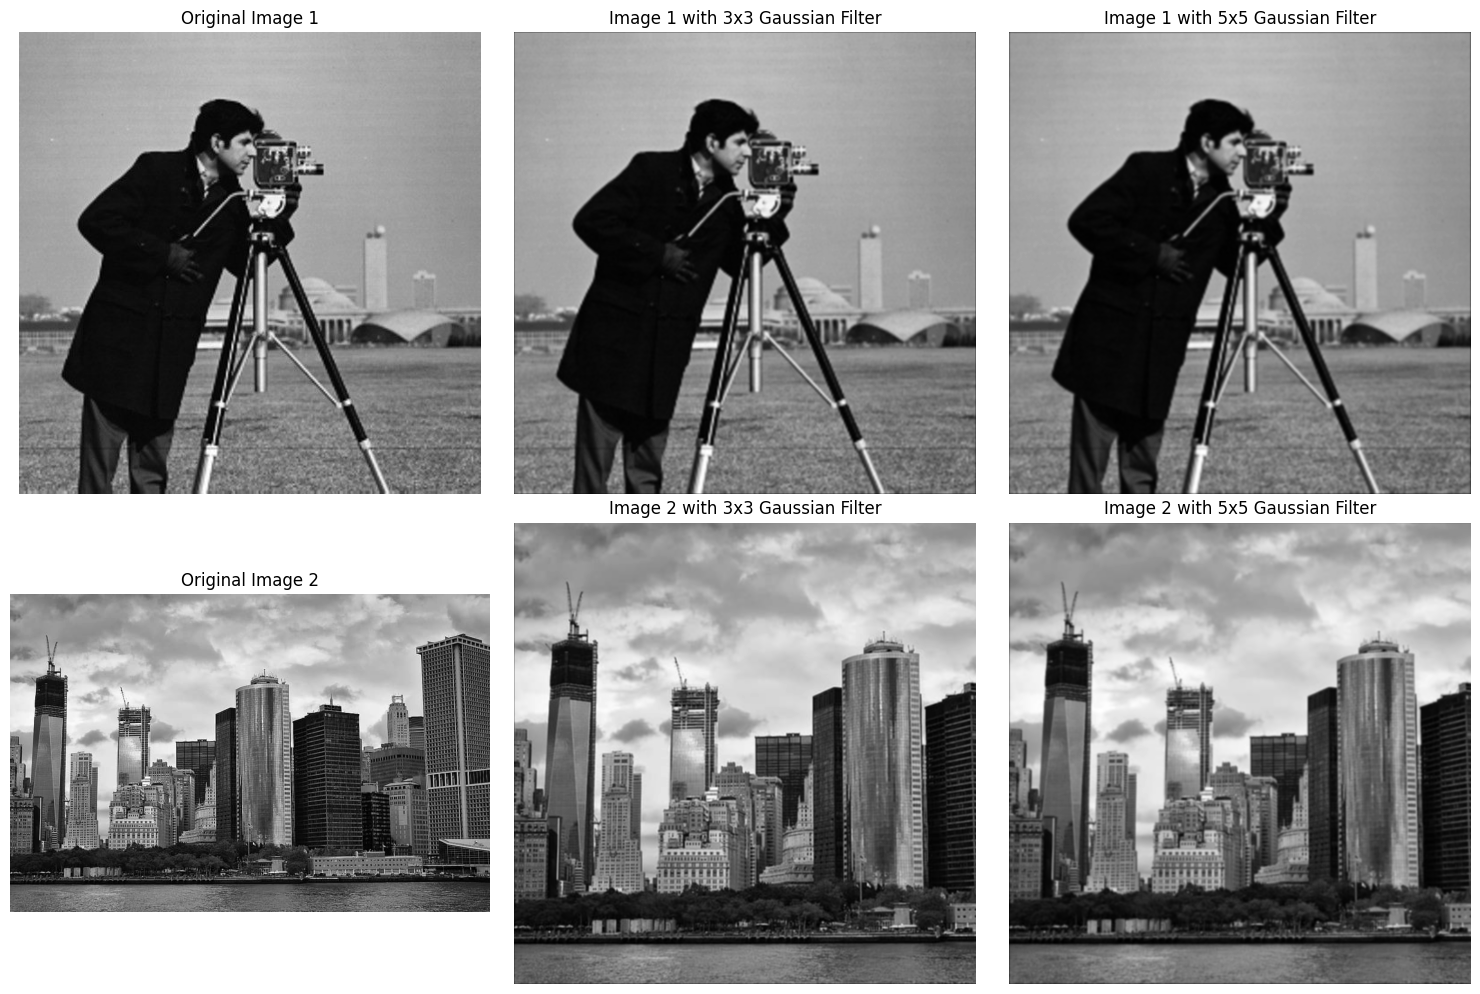

In [107]:
# Apply Gaussian filters to the images
filtered_image1_3x3 = apply_filter(image1, gaussian_filter_3x3, stride=1, padding=1)
filtered_image2_3x3 = apply_filter(image2, gaussian_filter_3x3, stride=1, padding=1)

filtered_image1_5x5 = apply_filter(image1, gaussian_filter_5x5, stride=1, padding=2)
filtered_image2_5x5 = apply_filter(image2, gaussian_filter_5x5, stride=1, padding=2)

# Plot results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image1, cmap='gray')
axs[0, 0].set_title('Original Image 1')
axs[0, 1].imshow(filtered_image1_3x3, cmap='gray')
axs[0, 1].set_title('Image 1 with 3x3 Gaussian Filter')
axs[0, 2].imshow(filtered_image1_5x5, cmap='gray')
axs[0, 2].set_title('Image 1 with 5x5 Gaussian Filter')

axs[1, 0].imshow(image2, cmap='gray')
axs[1, 0].set_title('Original Image 2')
axs[1, 1].imshow(filtered_image2_3x3, cmap='gray')
axs[1, 1].set_title('Image 2 with 3x3 Gaussian Filter')
axs[1, 2].imshow(filtered_image2_5x5, cmap='gray')
axs[1, 2].set_title('Image 2 with 5x5 Gaussian Filter')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()



### (ii) DoG Filter

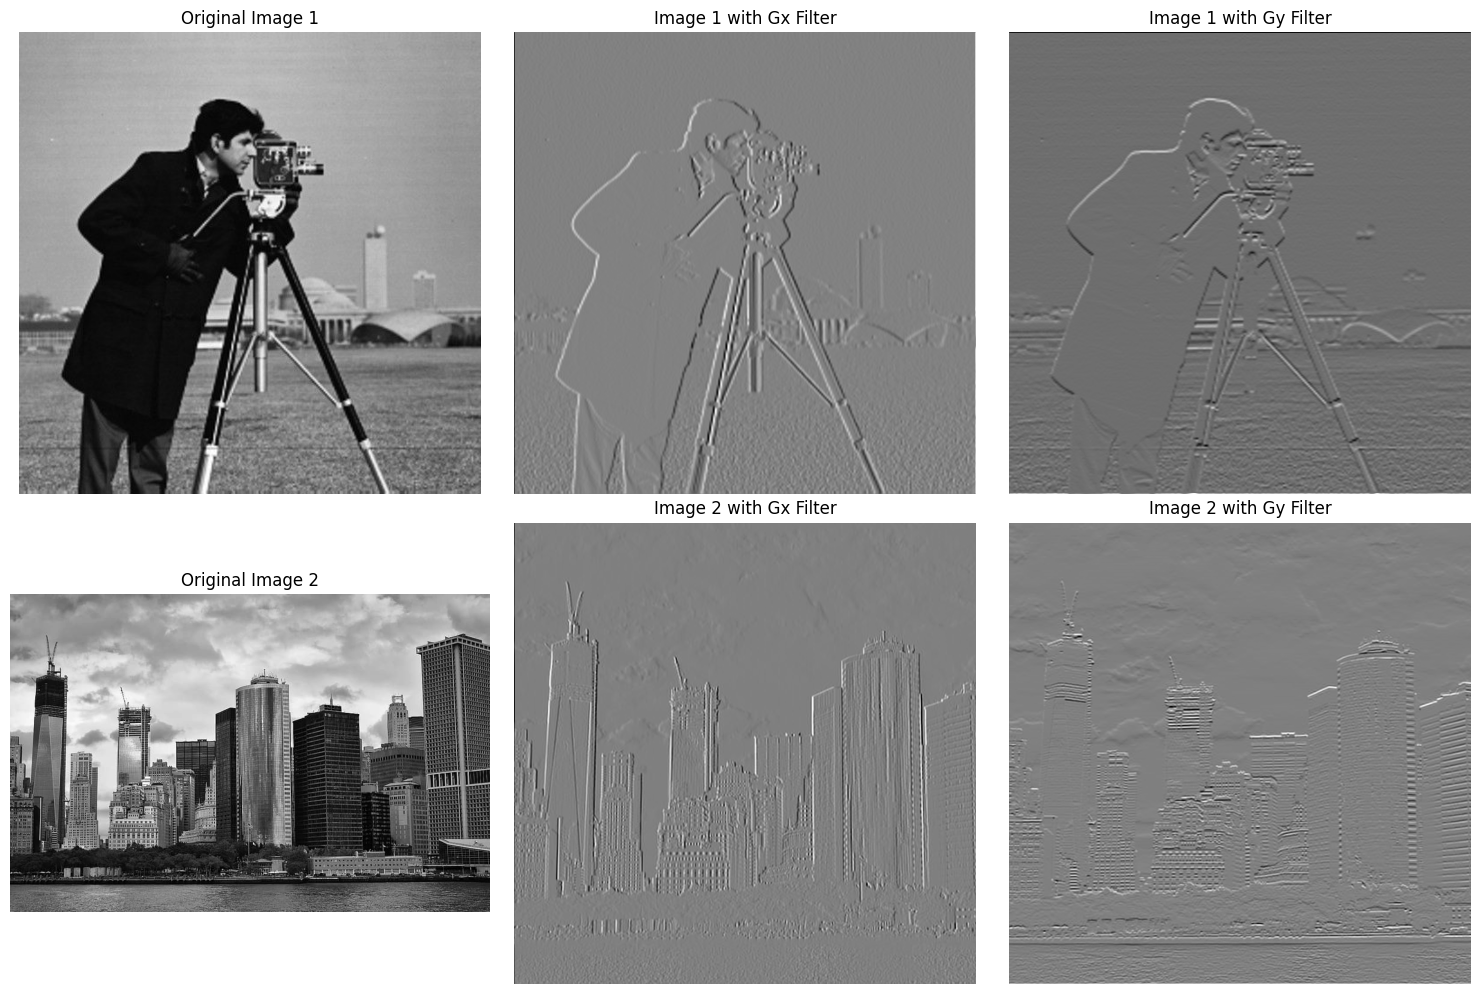

In [108]:
# Define derivative of gaussian filters
g_x = np.array([[1, 0, -1],
                [2, 0, -2],
                [1, 0, -1]])

g_y = np.array([[1, 2, 1],
                [0, 0, 0],
                [-1, -2, -1]])


# Apply derivative of gaussian filters to the images
filtered_image1_gx = apply_filter(image1, g_x, stride=1, padding=1)
filtered_image2_gx = apply_filter(image2, g_x, stride=1, padding=1)

filtered_image1_gy = apply_filter(image1, g_y, stride=1, padding=1)
filtered_image2_gy = apply_filter(image2, g_y, stride=1, padding=1)

# Plot results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image1, cmap='gray')
axs[0, 0].set_title('Original Image 1')
axs[0, 1].imshow(filtered_image1_gx, cmap='gray')
axs[0, 1].set_title('Image 1 with Gx Filter')
axs[0, 2].imshow(filtered_image1_gy, cmap='gray')
axs[0, 2].set_title('Image 1 with Gy Filter')

axs[1, 0].imshow(image2, cmap='gray')
axs[1, 0].set_title('Original Image 2')
axs[1, 1].imshow(filtered_image2_gx, cmap='gray')
axs[1, 1].set_title('Image 2 with Gx Filter')
axs[1, 2].imshow(filtered_image2_gy, cmap='gray')
axs[1, 2].set_title('Image 2 with Gy Filter')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()


### (iii) Sobal Filter

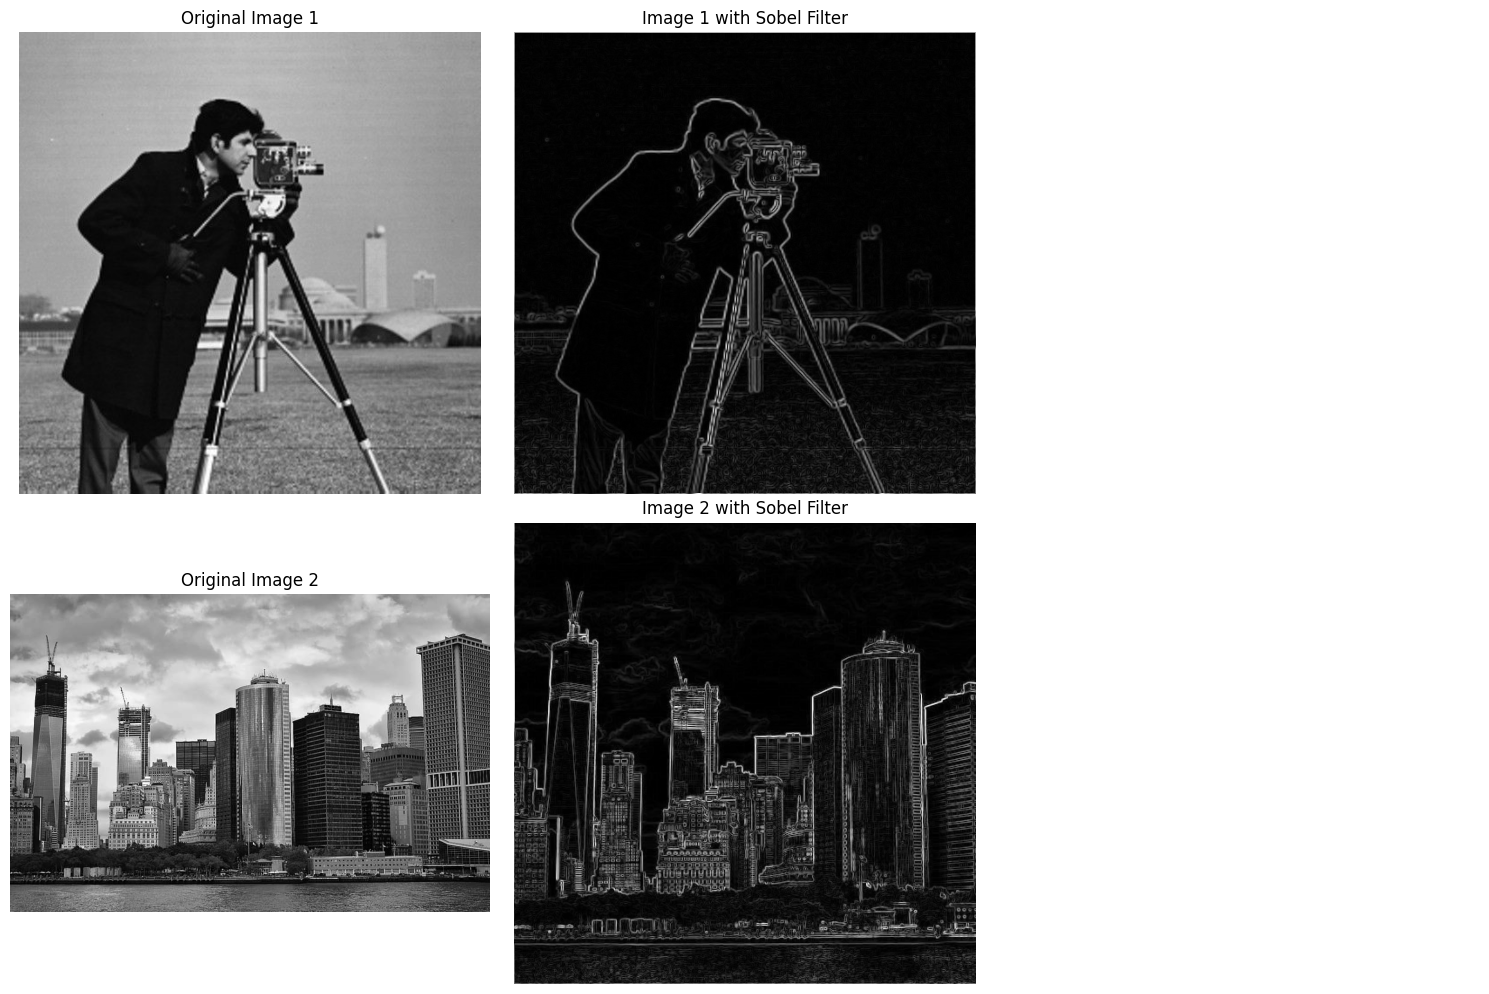

In [109]:
# Compute the sobel filter for the images
sobal_image1 = np.sqrt(filtered_image1_gx**2 + filtered_image1_gy**2)
sobal_image2 = np.sqrt(filtered_image2_gx**2 + filtered_image2_gy**2)

# Plot results
fig, axs = plt.subplots(2, 3, figsize=(15, 10))
axs[0, 0].imshow(image1, cmap='gray')
axs[0, 0].set_title('Original Image 1')
axs[0, 1].imshow(sobal_image1, cmap='gray')
axs[0, 1].set_title('Image 1 with Sobel Filter')

axs[1, 0].imshow(image2, cmap='gray')
axs[1, 0].set_title('Original Image 2')
axs[1, 1].imshow(sobal_image2, cmap='gray')
axs[1, 1].set_title('Image 2 with Sobel Filter')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Part 2

### (i) K-Means

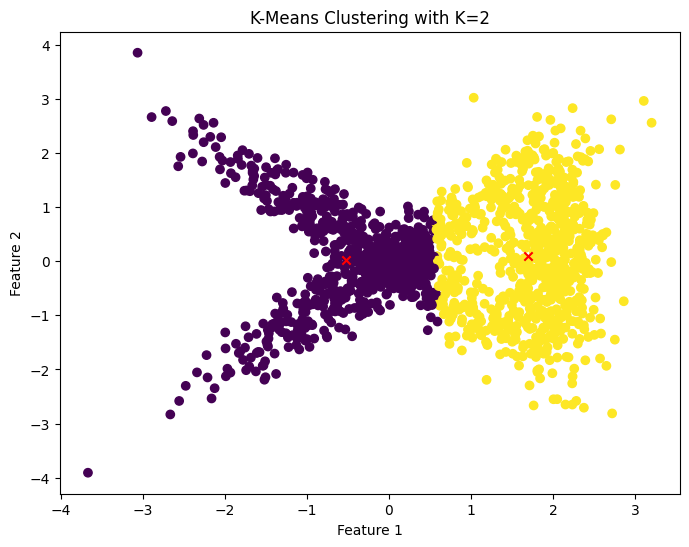

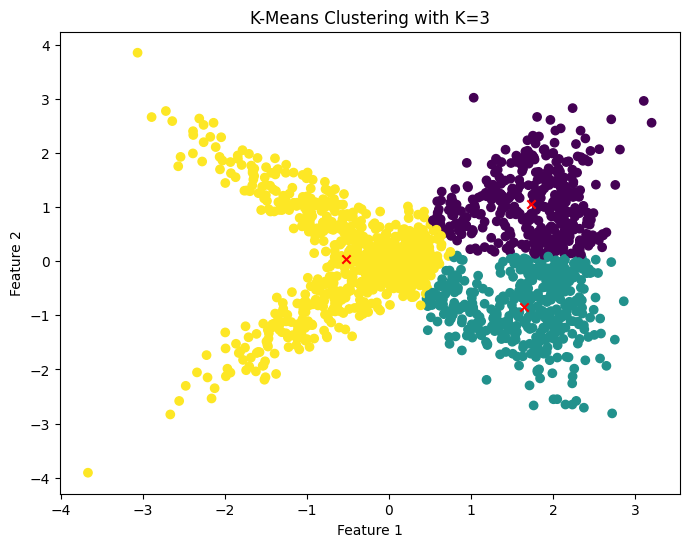

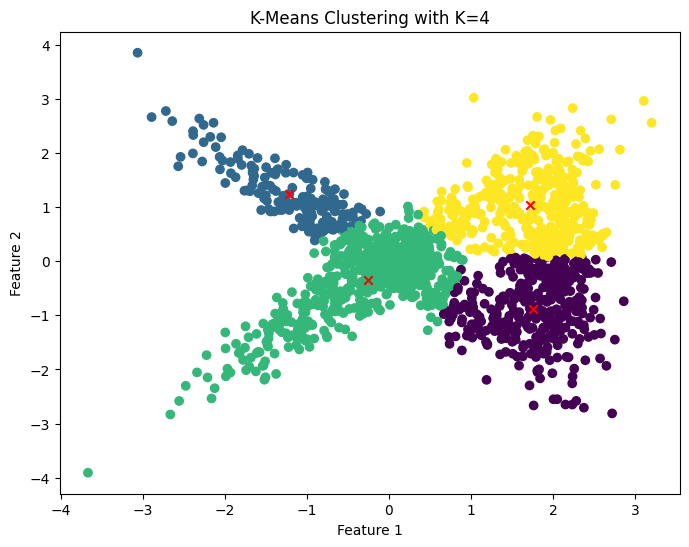

K=2, Sum of Squares Error=2228.619218804037
K=3, Sum of Squares Error=1539.2566749916352
K=4, Sum of Squares Error=1103.5070477213324


In [110]:
import random

R = 100

# Load dataset
def load_dataset(file_path):
    return np.loadtxt(file_path)

# Initialize centroids
def initialize_centroids(data, K):
    return data[np.random.choice(data.shape[0], K, replace=False)]

# Assign clusters
def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

# Update centroids
def update_centroids(data, labels, K):
    return np.array([data[labels == k].mean(axis=0) for k in range(K)])

# Compute sum of squares error
def compute_sse(data, labels, centroids):
    return np.sum((data - centroids[labels])**2)

# K-Means algorithm
def kmeans(data, K, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, K)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, K)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids, compute_sse(data, labels, centroids)

# Run K-Means multiple times and select the best result
def run_kmeans_multiple_times(data, K, r=10):
    best_sse = float('inf')
    best_labels = None
    best_centroids = None
    for _ in range(r):
        labels, centroids, sse = kmeans(data, K)
        if sse < best_sse:
            best_sse = sse
            best_labels = labels
            best_centroids = centroids
    return best_labels, best_centroids, best_sse

# Load the dataset
data = load_dataset('data/510_cluster_dataset.txt')

# Run K-Means for K=2, K=3, K=4 and plot the results
Ks = [2, 3, 4]
results = []

for K in Ks:
    labels, centroids, sse = run_kmeans_multiple_times(data, K, R)
    results.append((K, labels, centroids, sse))

    # Plotting
    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', marker='o')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
    plt.title(f'K-Means Clustering with K={K}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

# Report sum of squares error for each model
for K, labels, centroids, sse in results:
    print(f'K={K}, Sum of Squares Error={sse}')


### (ii) K-Means on Images

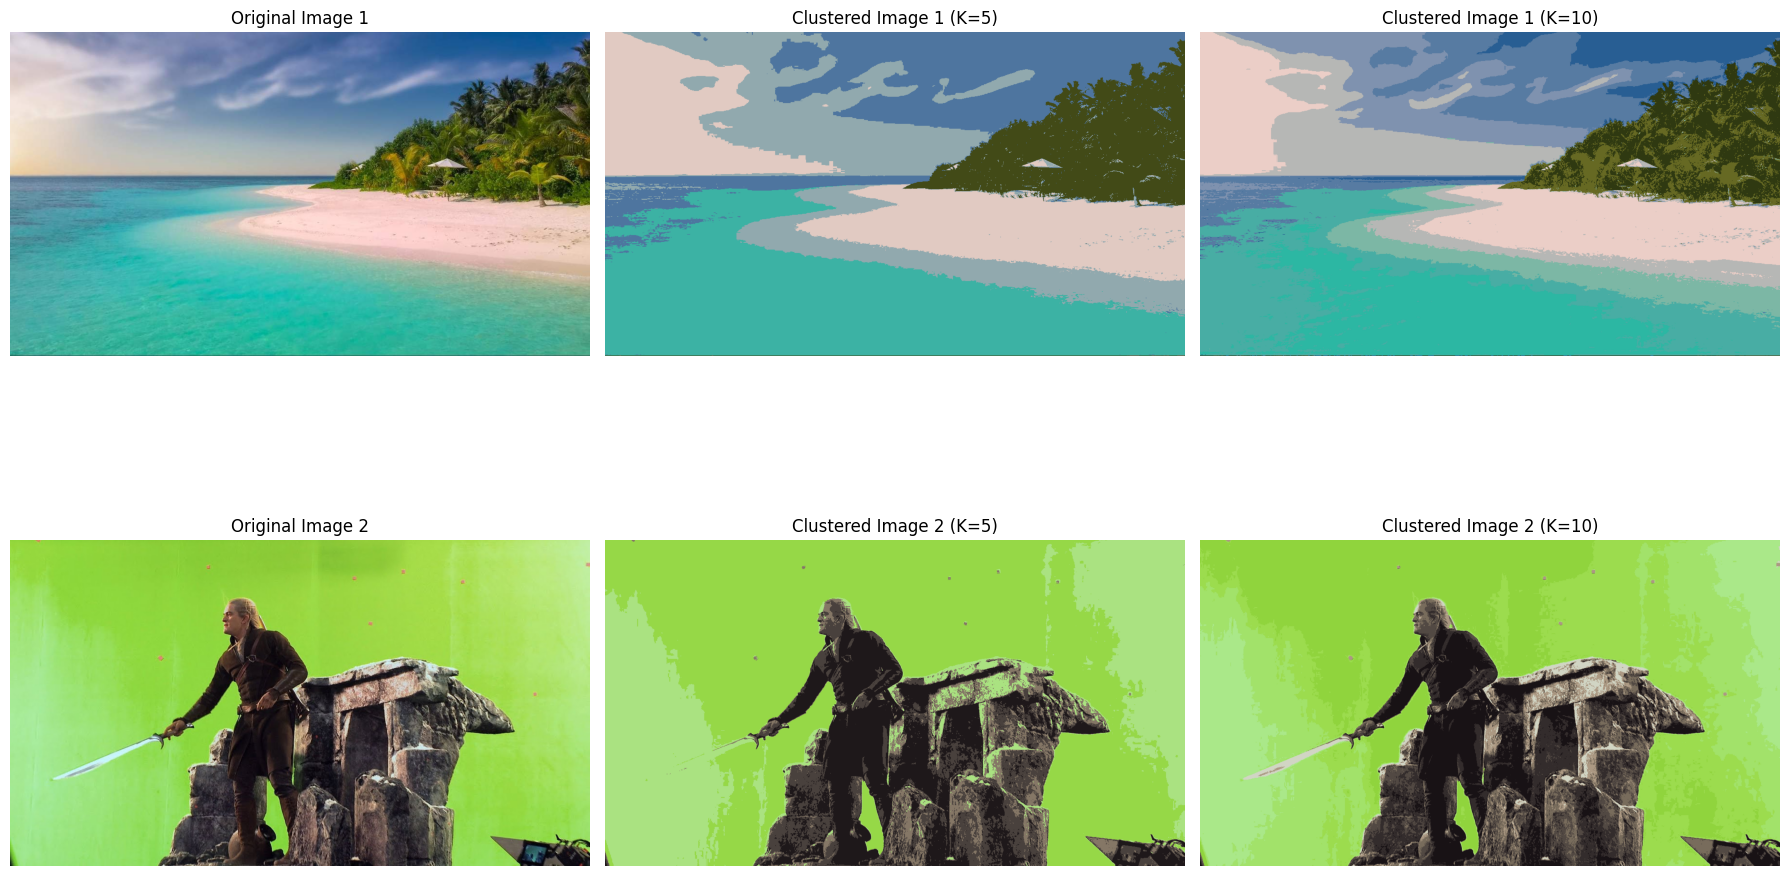

In [113]:
# Load the images
def load_image(image_path):
    image = Image.open(image_path).convert('RGB')
    return np.array(image)

# Reshape image data for K-Means
def reshape_image_data(image):
    return image.reshape((-1, 3))

# Reconstruct image from clustered data
def reconstruct_image(clustered_data, image_shape):
    return clustered_data.reshape(image_shape)

# Apply K-Means to images
def apply_kmeans_to_image(image, K):
    image_data = reshape_image_data(image)
    labels, centroids, _ = run_kmeans_multiple_times(image_data, K)
    clustered_image_data = centroids[labels]
    clustered_image = reconstruct_image(clustered_image_data, image.shape)
    return clustered_image

# K-Means algorithm and helper functions (including fix for empty clusters)
def initialize_centroids(data, K):
    return data[np.random.choice(data.shape[0], K, replace=False)]

def assign_clusters(data, centroids):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    return np.argmin(distances, axis=1)

def update_centroids(data, labels, K):
    new_centroids = []
    for k in range(K):
        if np.any(labels == k):
            new_centroids.append(data[labels == k].mean(axis=0))
        else:
            new_centroids.append(data[np.random.choice(data.shape[0])])
    return np.array(new_centroids)

def compute_sse(data, labels, centroids):
    return np.sum((data - centroids[labels])**2)

def kmeans(data, K, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(data, K)
    for _ in range(max_iters):
        labels = assign_clusters(data, centroids)
        new_centroids = update_centroids(data, labels, K)
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    return labels, centroids, compute_sse(data, labels, centroids)

def run_kmeans_multiple_times(data, K, r=10):
    best_sse = float('inf')
    best_labels = None
    best_centroids = None
    for _ in range(r):
        labels, centroids, sse = kmeans(data, K)
        if sse < best_sse:
            best_sse = sse
            best_labels = labels
            best_centroids = centroids
    return best_labels, best_centroids, best_sse

# Load images
image1 = load_image('images/Kmean_img1.jpg')
image2 = load_image('images/Kmean_img2.jpg')

# Apply K-Means with K=5 and K=10 for both images
clustered_image1_k5 = apply_kmeans_to_image(image1, 5)
clustered_image1_k10 = apply_kmeans_to_image(image1, 10)
clustered_image2_k5 = apply_kmeans_to_image(image2, 5)
clustered_image2_k10 = apply_kmeans_to_image(image2, 10)

# Plot results
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Original and clustered images for image1
axs[0, 0].imshow(image1)
axs[0, 0].set_title('Original Image 1')
axs[0, 1].imshow(clustered_image1_k5.astype(np.uint8))
axs[0, 1].set_title('Clustered Image 1 (K=5)')
axs[0, 2].imshow(clustered_image1_k10.astype(np.uint8))
axs[0, 2].set_title('Clustered Image 1 (K=10)')

# Original and clustered images for image2
axs[1, 0].imshow(image2)
axs[1, 0].set_title('Original Image 2')
axs[1, 1].imshow(clustered_image2_k5.astype(np.uint8))
axs[1, 1].set_title('Clustered Image 2 (K=5)')
axs[1, 2].imshow(clustered_image2_k10.astype(np.uint8))
axs[1, 2].set_title('Clustered Image 2 (K=10)')

for ax in axs.flat:
    ax.axis('off')

plt.tight_layout()
plt.show()

## Part 3

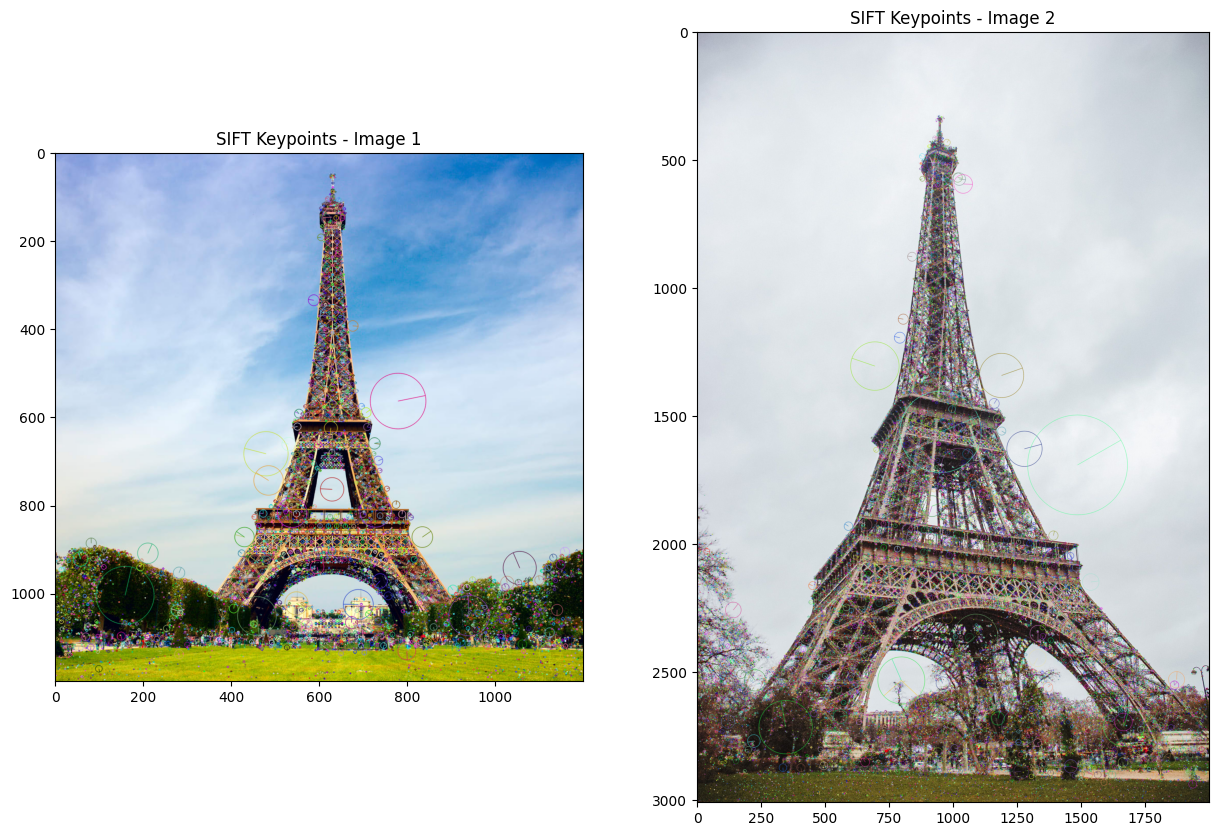

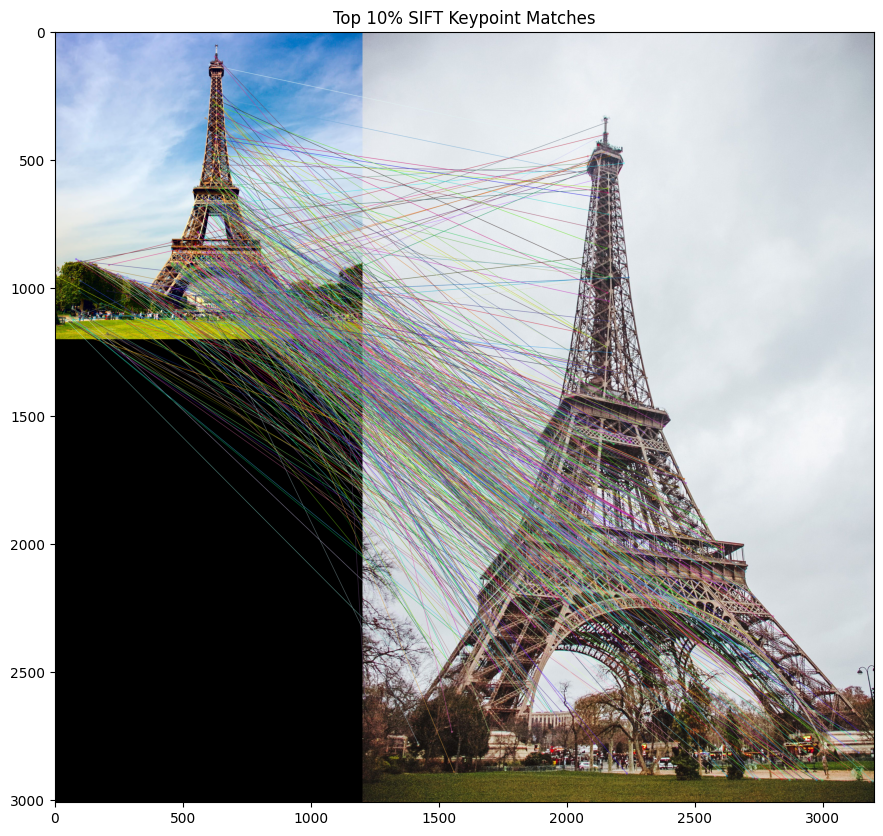

In [115]:
import cv2

# Load the images
def load_image(image_path):
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    return image, gray

# Compute SIFT keypoints and descriptors
def compute_sift_features(image):
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

# Draw keypoints on the image
def draw_keypoints(image, keypoints):
    return cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Calculate the L2 distance between two descriptors
def l2_distance(descriptor1, descriptor2):
    return np.linalg.norm(descriptor1 - descriptor2)

# Find nearest neighbors manually
def find_nearest_neighbors(descriptors1, descriptors2):
    matches = []
    for i, descriptor1 in enumerate(descriptors1):
        distances = np.array([l2_distance(descriptor1, descriptor2) for descriptor2 in descriptors2])
        nearest_neighbor_index = np.argmin(distances)
        match = cv2.DMatch(_queryIdx=i, _trainIdx=nearest_neighbor_index, _distance=distances[nearest_neighbor_index])
        matches.append(match)
    return matches

# Load and process images
image1, gray1 = load_image('images/SIFT1_img.jpg')
image2, gray2 = load_image('images/SIFT2_img.jpg')

# Compute SIFT features
keypoints1, descriptors1 = compute_sift_features(gray1)
keypoints2, descriptors2 = compute_sift_features(gray2)

# Draw keypoints
image1_with_keypoints = draw_keypoints(image1, keypoints1)
image2_with_keypoints = draw_keypoints(image2, keypoints2)

# Visualize keypoints
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image1_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints - Image 1')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(image2_with_keypoints, cv2.COLOR_BGR2RGB))
plt.title('SIFT Keypoints - Image 2')
plt.show()

# Find nearest neighbors manually
matches = find_nearest_neighbors(descriptors1, descriptors2)

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Select top 10% matches
top_matches = matches[:len(matches) // 10]

# Draw top 10% matches
top_matches_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, top_matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

# Visualize top 10% matches
plt.figure(figsize=(15, 10))
plt.imshow(cv2.cvtColor(top_matches_image, cv2.COLOR_BGR2RGB))
plt.title('Top 10% SIFT Keypoint Matches')
plt.show()